## Importando Librerias Necesarias

In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## 1. Lectura y Visualización de datos

In [56]:
data = pd.read_csv('./datos/emails.csv')
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [57]:
print("Número de características:", len(data.columns))
print("Longitud del conjunto de datos:", len(data))

Número de características: 3002
Longitud del conjunto de datos: 5172


In [58]:
data.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [59]:
# 1500 correos clasificados como spam, 3672 correos no spam
# El conjunto de datos se encuntra desequilabrado
data["Prediction"].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [61]:
# Comprobamos si alguna columna tiene valores nulos
data.isna().any()

Email No.     False
the           False
to            False
ect           False
and           False
              ...  
military      False
allowing      False
ff            False
dry           False
Prediction    False
Length: 3002, dtype: bool

In [62]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


In [63]:
data.corr()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


In [64]:
# Representación gráfica de dos características
plt.figure(figsize=(14, 6))
plt.scatter(df["V10"][df['Class'] == 0], df["V14"][df['Class'] == 0], c="g", marker=".")
plt.scatter(df["V10"][df['Class'] == 1], df["V14"][df['Class'] == 1], c="r", marker=".")
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

NameError: name 'df' is not defined

<Figure size 1008x432 with 0 Axes>

## 2. División de datos
División de datos en 3 grupos diferentes: datos de entrenamiento (train), de prueba (test) y de validación (val).

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = data.loc[:,'the':'dry'].values 
y = data["Prediction"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

## 3. Preparación del conjunto de datos

Para este tipo de algoritmos es importante que todos los datos se encuentren en un rango similar, por lo tanto, podemos aplicar una función de escalado o normalización. En este caso utilizaré MinMaxScaler de Scikit Learn

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
scaler.fit(X_train)

MinMaxScaler()

In [71]:
X_train = scaler.transform(X_train)

In [72]:
X_test = scaler.transform(X_test)

In [73]:
X_val = scaler.transform(X_val)

In [74]:
X_train

array([[0.03333333, 0.03603604, 0.00293255, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04285714, 0.04504505, 0.00293255, ..., 0.        , 0.01754386,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0990991 , 0.        , ..., 0.        , 0.02631579,
        0.        ],
       [0.01428571, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## 4. Definición de la arquitectura de la red neuronal

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [76]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy', 'Precision'])


En la variable ***history*** se almacenan varios valores importantes:
* El valor de los parámetros del modelo después del entrenamiento
* La lista de *epochs* llevados a cabo
* Un diccionario con el error producido en cada *epoch* en el conjunto de datos de entreanamiento y validación

In [77]:
history = model.fit(X_train, 
                    y_train,
                   epochs=300,
                   validation_data=(X_val, y_val))

Epoch 1/300
114/114 [==============================] - 1s 4ms/step - loss: 0.6627 - accuracy: 0.7008 - precision: 0.2482 - val_loss: 0.6188 - val_accuracy: 0.7010 - val_precision: 0.0000e+00
Epoch 2/300
114/114 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7065 - precision: 0.0000e+00 - val_loss: 0.5985 - val_accuracy: 0.7010 - val_precision: 0.0000e+00
Epoch 3/300
114/114 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7058 - precision: 0.0000e+00 - val_loss: 0.5867 - val_accuracy: 0.7010 - val_precision: 0.0000e+00
Epoch 4/300
114/114 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.7164 - precision: 0.0000e+00 - val_loss: 0.5712 - val_accuracy: 0.7010 - val_precision: 0.0000e+00
Epoch 5/300
114/114 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7088 - precision: 0.5217 - val_loss: 0.5511 - val_accuracy: 0.7088 - val_precision: 1.0000
Epoch 6/300
114/114 [================

114/114 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9927 - precision: 0.9829 - val_loss: 0.1122 - val_accuracy: 0.9704 - val_precision: 0.9336
Epoch 45/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9947 - precision: 0.9856 - val_loss: 0.1120 - val_accuracy: 0.9691 - val_precision: 0.9298
Epoch 46/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9953 - precision: 0.9860 - val_loss: 0.1171 - val_accuracy: 0.9626 - val_precision: 0.9109
Epoch 47/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9923 - precision: 0.9773 - val_loss: 0.1119 - val_accuracy: 0.9716 - val_precision: 0.9412
Epoch 48/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9924 - precision: 0.9817 - val_loss: 0.1111 - val_accuracy: 0.9716 - val_precision: 0.9412
Epoch 49/300
114/114 [==============================] - 0s 2ms/step - los

Epoch 88/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9982 - precision: 0.9959 - val_loss: 0.1237 - val_accuracy: 0.9716 - val_precision: 0.9449
Epoch 89/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9970 - precision: 0.9929 - val_loss: 0.1253 - val_accuracy: 0.9704 - val_precision: 0.9409
Epoch 90/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9970 - precision: 0.9915 - val_loss: 0.1238 - val_accuracy: 0.9704 - val_precision: 0.9447
Epoch 91/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9977 - precision: 0.9949 - val_loss: 0.1249 - val_accuracy: 0.9716 - val_precision: 0.9449
Epoch 92/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9984 - precision: 0.9964 - val_loss: 0.1262 - val_accuracy: 0.9716 - val_precision: 0.9449
Epoch 93/300
114/114 [==============================] - 0s 2

114/114 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9988 - precision: 0.9982 - val_loss: 0.1403 - val_accuracy: 0.9716 - val_precision: 0.9449
Epoch 132/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9994 - precision: 0.9988 - val_loss: 0.1408 - val_accuracy: 0.9704 - val_precision: 0.9409
Epoch 133/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9997 - precision: 0.9992 - val_loss: 0.1414 - val_accuracy: 0.9691 - val_precision: 0.9370
Epoch 134/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9988 - precision: 0.9990 - val_loss: 0.1464 - val_accuracy: 0.9691 - val_precision: 0.9298
Epoch 135/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9989 - precision: 0.9978 - val_loss: 0.1394 - val_accuracy: 0.9691 - val_precision: 0.9444
Epoch 136/300
114/114 [==============================] - 0s 2ms/step 

114/114 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9991 - precision: 0.9976 - val_loss: 0.1537 - val_accuracy: 0.9729 - val_precision: 0.9451
Epoch 175/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9999 - precision: 0.9998 - val_loss: 0.1527 - val_accuracy: 0.9729 - val_precision: 0.9489
Epoch 176/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9999 - precision: 0.9998 - val_loss: 0.1545 - val_accuracy: 0.9716 - val_precision: 0.9412
Epoch 177/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9999 - precision: 0.9996 - val_loss: 0.1589 - val_accuracy: 0.9678 - val_precision: 0.9259
Epoch 178/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9996 - precision: 0.9985 - val_loss: 0.1518 - val_accuracy: 0.9704 - val_precision: 0.9485
Epoch 179/300
114/114 [==============================] - 0s 2ms/step 

114/114 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 0.1609 - val_accuracy: 0.9729 - val_precision: 0.9567
Epoch 218/300
114/114 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.9999 - precision: 0.9997 - val_loss: 0.1629 - val_accuracy: 0.9729 - val_precision: 0.9489
Epoch 219/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9994 - precision: 0.9980 - val_loss: 0.1625 - val_accuracy: 0.9716 - val_precision: 0.9487
Epoch 220/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9999 - precision: 0.9997 - val_loss: 0.1625 - val_accuracy: 0.9716 - val_precision: 0.9487
Epoch 221/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9996 - precision: 0.9986 - val_loss: 0.1696 - val_accuracy: 0.9691 - val_precision: 0.9298
Epoch 222/300
114/114 [==============================] - 0s 2ms/step 

114/114 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.9998 - precision: 0.9994 - val_loss: 0.1710 - val_accuracy: 0.9716 - val_precision: 0.9487
Epoch 261/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9997 - precision: 0.9988 - val_loss: 0.1736 - val_accuracy: 0.9704 - val_precision: 0.9409
Epoch 262/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9997 - precision: 0.9989 - val_loss: 0.1769 - val_accuracy: 0.9678 - val_precision: 0.9295
Epoch 263/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9997 - precision: 0.9989 - val_loss: 0.1741 - val_accuracy: 0.9704 - val_precision: 0.9409
Epoch 264/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9994 - precision: 0.9979 - val_loss: 0.1731 - val_accuracy: 0.9716 - val_precision: 0.9449
Epoch 265/300
114/114 [==============================] - 0s 2ms/step 

<Figure size 864x504 with 0 Axes>

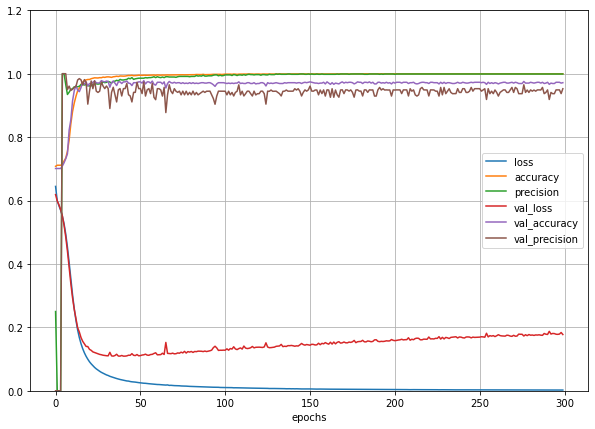

In [86]:
plt.figure(figsize=(12,7))
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

## 5. Validación con el conjunto de datos de pruebas

In [80]:
test_loss, test_acc, test_prec = model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.9742 - precision: 0.9511


In [81]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.9742268323898315
test_prec: 0.9511111378669739


In [ ]:
data["esrb_rating"].unique()

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
data['esrb_rating']= label_encoder.fit_transform(data['esrb_rating']) 
  
data['esrb_rating'].unique()

In [ ]:
data